<a href="https://colab.research.google.com/github/jaesunkkk/esaa_assignment/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df=pd.read_csv('/content/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ###학습 데이터 정보 ### \n')
print(titanic_df.info())


 ###학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터세트 Null 값의 개수', titanic_df.isnull().sum().sum())


데이터세트 Null 값의 개수 0


In [5]:
print('Sex값의 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin값의 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값의 분포: \n', titanic_df['Embarked'].value_counts())

Sex값의 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값의 분포: 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
C104             1
B39              1
D6               1
E77              1
D48              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값의 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [7]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

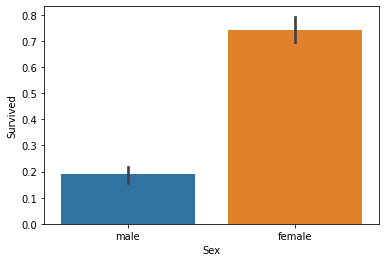

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

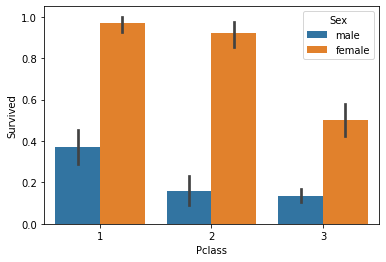

In [10]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [11]:
def get_category(age):
    cat=''
    if age<=1: cat='Unknowm'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenger'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    return cat

In [12]:
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult', 'Adult','Elderly']

<Figure size 720x432 with 0 Axes>

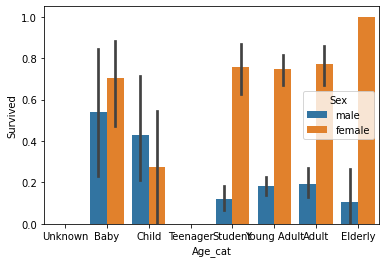

In [13]:
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex' , data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [14]:
from sklearn import preprocessing
def encode_features(dataDF):
    features=['Cabin', 'Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]= le.transform(dataDF[feature])
        
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [44]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [45]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

In [46]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [47]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [48]:
titanic_df=pd.read_csv('/content/train.csv')

In [49]:
y_titanic_df=titanic_df['Survived']

In [50]:
X_titanic_df=titanic_df.drop('Survived', axis=1)

In [51]:
X_titanic_df=transform_features(X_titanic_df)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
Ir_clf=LogisticRegression()

In [60]:
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred= rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:4f}'.format(accuracy_score(y_test, rf_pred)))

Ir_clf.fit(X_train, y_train)
lr_pred= Ir_clf.predict(X_test)
print('LogisticRegression 정확도:{0:4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.787709
RandomForestClassifier 정확도:0.854749
LogisticRegression 정확도:0.849162


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
from sklearn.model_selection import KFold

In [59]:
def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    
    for iter_count,(train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test= X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions= clf.predict(X_test)
        accuracy= accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증{0} 정확도: {1:4f}".format(iter_count, accuracy))
        
        
    mean_score=np.mean(scores)
    print("평균 정확도: {0:4f}".format(mean_score))
    
    
exec_kfold(dt_clf, folds=5)

교차검증0 정확도: 0.754190
교차검증1 정확도: 0.780899
교차검증2 정확도: 0.786517
교차검증3 정확도: 0.769663
교차검증4 정확도: 0.820225
평균 정확도: 0.782299


In [61]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_clf,X_titanic_df,y_titanic_df, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정획도: {1:4f}".format(iter_count,accuracy))
    
print("평균정확도: {0:4f}".format(np.mean(scores)))

교차검증 0 정획도: 0.743017
교차검증 1 정획도: 0.775281
교차검증 2 정획도: 0.792135
교차검증 3 정획도: 0.786517
교차검증 4 정획도: 0.842697
평균정확도: 0.787929


In [62]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

dpredictions= best_dclf.predict(X_test)
accuracy= accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassfier 정확도: {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.799183
테스트 세트에서의 DecisionTreeClassfier 정확도: 0.871508
